In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/bank-marketing-additional-full'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-additional-full/bank-additional-full.csv


# Load Data

In [2]:
bank_full = pd.read_csv('/kaggle/input/bank-marketing-additional-full/bank-additional-full.csv', sep=';')

In [3]:
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#  Cek ukuran data (rows x columns)
bank_full.info()
print("Ukuran dataset \n baris dan kolom :", bank_full.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Cleaning

In [7]:
#  Inspect structure and summary
# This helps us understand datatypes, non-null counts, and basic statistics
bank_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Short summary statistic
bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# sum unique value
bank_full.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [10]:
#  Handling missing values
# Check for missing values in both absolute numbers and percentages

print(bank_full.isnull().sum())
print((bank_full.isnull().sum() / len(bank_full)) * 100)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [11]:
# Remove duplicates , (if there is duplicate !)
# Duplicate rows can introduce bias, so we remove them

print("Duplicate rows before:", bank_full.duplicated().sum())
bank_full = bank_full.drop_duplicates()
print("Duplicate rows after:", bank_full.duplicated().sum())

Duplicate rows before: 12
Duplicate rows after: 0


In [12]:
# Standardize categorical values

# Convert all categorical string values to lowercase for consistency
for col in bank_full.select_dtypes(include='object').columns:
    bank_full.loc[:, col] = bank_full[col].str.lower()

In [13]:
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


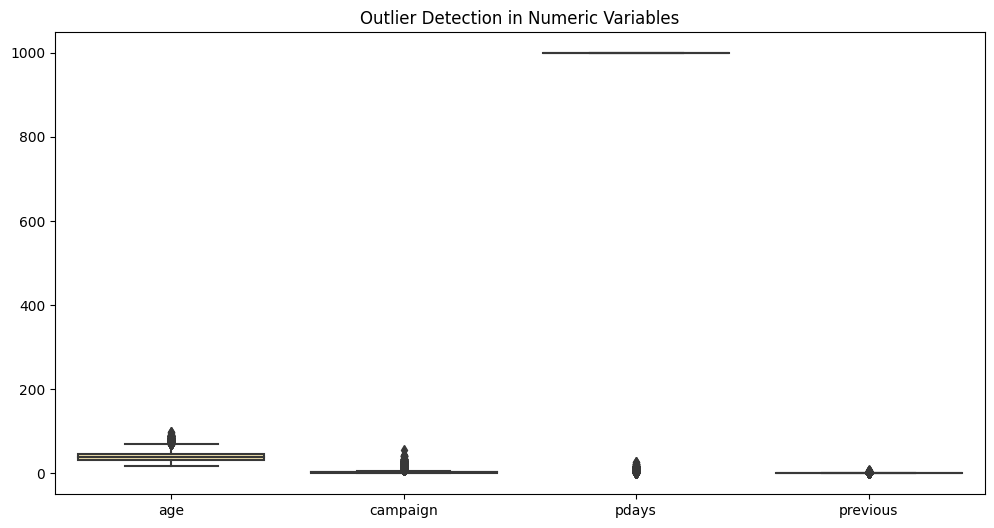

In [14]:
#  Outlier detection
# Visualize outliers in numeric variables using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=bank_full[['age', 'campaign','pdays', 'previous']], palette="YlOrBr")
plt.title("Outlier Detection in Numeric Variables")
plt.show()

In [15]:
# Statistik Deskriptif
bank_full['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

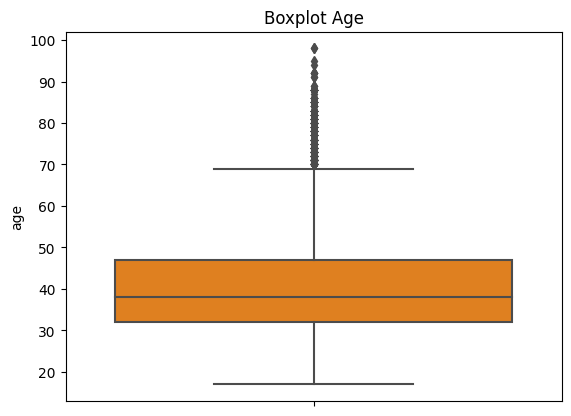

In [16]:
# Boxplot For age
sns.boxplot(y=bank_full['age'], palette='autumn')

plt.title("Boxplot Age")
plt.show()

In [17]:
# Special column handling

# - pdays = 999 means client has never been contacted -> replace with NaN
bank_full.loc[:, 'pdays'] = bank_full['pdays'].replace(999, np.nan)

/tmp/ipykernel_13/118401696.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bank_full.loc[:, 'pdays'] = bank_full['pdays'].replace(999, np.nan)


In [18]:
bank_full.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# - duration (call length) is known only after the call, 
#   using it would cause data leakage -> drop the column
bank_full = bank_full.drop(columns=['duration'])

In [20]:
# Final check after cleaning
print("Final shape of dataset:", bank_full.shape)
print(bank_full.head())
warnings.filterwarnings("ignore", category=RuntimeWarning)

Final shape of dataset: (41176, 20)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    NaN         0  nonexistent           1.1   
1   may         mon         1    NaN         0  nonexistent           1.1   
2   may         mon         1    NaN         0  nonexistent           1.1   
3   may         mon         1    NaN         0  nonexistent           1.1   
4   may         mon         1    NaN         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Exploratory Data Analysis (EDA)

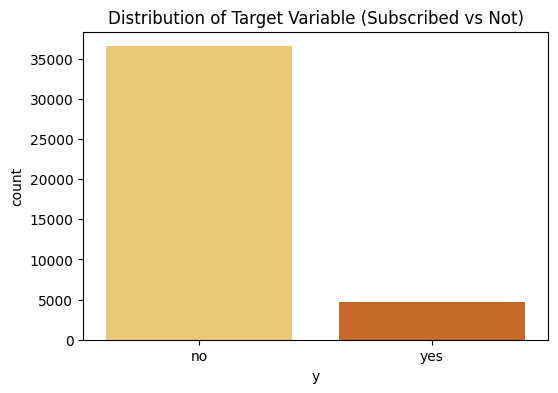

In [21]:
# 1. Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=bank_full, x='y', palette="YlOrBr")
plt.title("Distribution of Target Variable (Subscribed vs Not)")
plt.show()

1. Distribution of the Target Variable (y)

Typically, the distribution of "no" responses is much larger than that of "yes" responses (around 85–90% "no").

Implication: The dataset is unbalanced, so the model should be used with caution (use balancing techniques such as SMOTE, undersampling, or weighting).

For businesses: Current campaigns are inefficient → many customers are uninterested.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

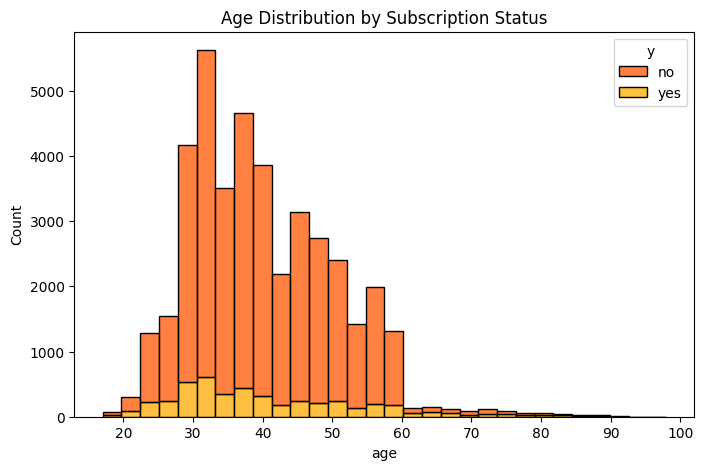

In [22]:
# 2. Age distribution by subscription
plt.figure(figsize=(8,5))
sns.histplot(data=bank_full, x='age', hue='y', multiple='stack', bins=30, palette='autumn')
plt.title("Age Distribution by Subscription Status")
plt.show()
warnings.filterwarnings("ignore")

2. Age Distribution by Subscription Status

It is possible that people aged 30–40 are more interested in opening a deposit account.

Younger people (<25 years old) and older people (>60 years old) are less likely to be interested.

Business implication: Target campaigns at productive age groups → more cost-effective.

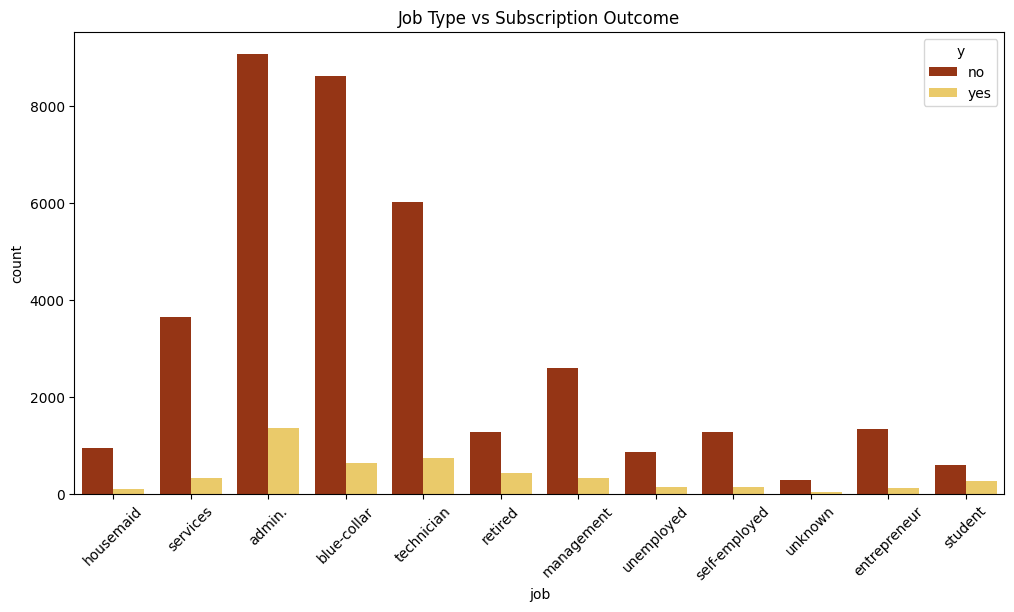

In [23]:
# 3. Job type vs subscription rate
plt.figure(figsize=(12,6))
sns.countplot(data=bank_full, x='job', hue='y', palette='afmhot')
plt.xticks(rotation=45)
plt.title("Job Type vs Subscription Outcome")
plt.show()

3. Occupation Type vs. Subscription Results

Professions such as management, engineering, and students may have a higher "yes" rate.

Meanwhile, blue-collar jobs or domestic helpers typically have lower subscription rates.

Business Implications: Banks can focus campaigns on potential professional segments to increase conversion rates.

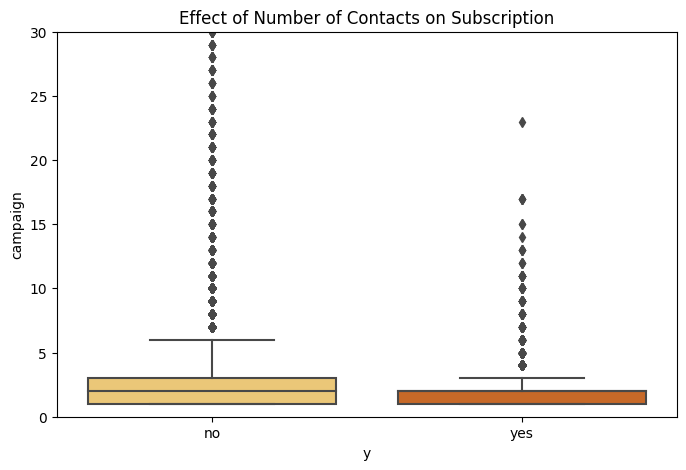

In [24]:
# 4. Campaign duration (number of contacts) effect
plt.figure(figsize=(8,5))
sns.boxplot(data=bank_full, x='y', y='campaign', palette='YlOrBr')
plt.ylim(0, 30)  # limit extreme outliers
plt.title("Effect of Number of Contacts on Subscription")
plt.show()


4. Effect of Campaign Duration (Number of Contacts)

Boxplots typically show that the longer the campaign (the more contacts in a single campaign), the lower the probability of a "yes" response.

The majority of "yes" responses occur within 1–3 contacts, with any longer being considered annoying.

Business Implications: Avoid contacting prospects too frequently; focus on the quality of the contacts.

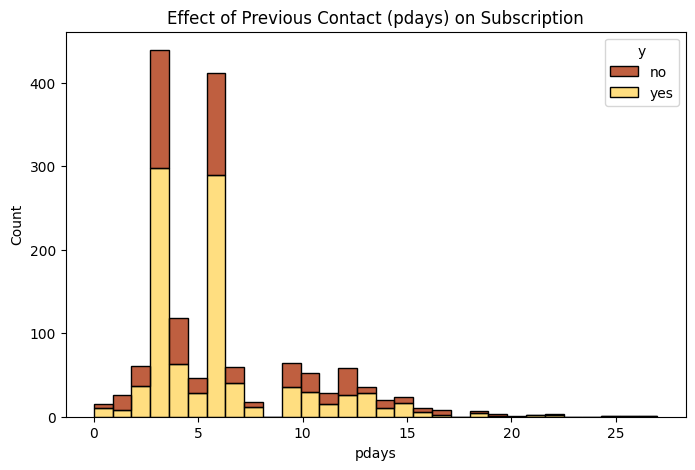

In [25]:
# 5. Pdays distribution
plt.figure(figsize=(8,5))
sns.histplot(data=bank_full, x='pdays', hue='y', multiple='stack', bins=30, palette='afmhot')
plt.title("Effect of Previous Contact (pdays) on Subscription")
plt.show()

5. Effect of Previous Contacts (pdays)

If pdays = -1 (never contacted before), the "yes" rate is typically lower.

If previously contacted (pdays >= 0), the probability of a "yes" response may be higher.

Business Implications: Following up with previously contacted prospects is more likely to be successful than making cold calls.

# Data Transformation & Feature Engineering

In [26]:
# 0) Start from a safe working copy
fe = bank_full.copy()

In [27]:
# If needed, enforce lowercase/canonical target
fe.loc[:, 'y'] = fe['y'].str.lower()

In [28]:
# Ensure pdays special code handled (safety, in case cleaning wasn’t run here)
fe.loc[:, 'pdays'] = fe['pdays'].replace(999, np.nan)

In [29]:
# Convenience/Binning Features (business-friendly)

# 1a) Was the client previously contacted?
fe.loc[:, 'prev_contacted'] = fe['pdays'].notna().astype(int)

In [30]:
# pdays buckets (treat NaN as "never")
#     Use a temporary -1 to capture "never" in a labeled bin
tmp_pdays = fe['pdays'].fillna(-1)
bins = [-2, -0.5, 7, 30, 90, np.inf]                # -1 => never; <=7; 8-30; 31-90; >90
labels = ['never', '≤7d', '8–30d', '31–90d', '>90d']
fe.loc[:, 'pdays_bin'] = pd.cut(tmp_pdays, bins=bins, labels=labels, right=True)

In [31]:
# Campaign intensity buckets
fe['campaign_bin'] = pd.cut(fe['campaign'], bins=3, labels=['low', 'medium', 'high'])

print(fe['campaign_bin'].value_counts())

campaign_bin
low       40989
medium      178
high          9
Name: count, dtype: int64


In [32]:
# Order time features (helps tree/linear models + clarity)
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
dow_order   = ['mon','tue','wed','thu','fri']
fe.loc[:, 'month'] = pd.Categorical(fe['month'], categories=month_order, ordered=True)
fe.loc[:, 'day_of_week'] = pd.Categorical(fe['day_of_week'], categories=dow_order, ordered=True)

In [33]:
# Target encode to binary (1=yes, 0=no)

y = fe['y'].map({'yes': 1, 'no': 0})

In [34]:
# Select columns for modeling
#   (Numerics kept continuous; engineered caps included; engineered categoricals included)

num_cols = [
    'age','pdays',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

cat_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome',
    'pdays_bin', 'campaign_bin', 'prev_contacted'
]

X = fe[num_cols + cat_cols]

In [35]:
# Train/Validation split (stratify to respect imbalance)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Preprocess: impute + scale (num), impute + one-hot (cat)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # robust against skew/outliers
    ('scaler', StandardScaler())                     # good for linear models
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

# Baseline model with class imbalance handling
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=None))
])

clf.fit(X_train, y_train)

# Quick evaluation (classification report + ROC-AUC)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\n=== Classification Report (Baseline Logistic, class_weight='balanced') ===")
print(classification_report(y_test, y_pred, digits=4))

print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))


=== Classification Report (Baseline Logistic, class_weight='balanced') ===
              precision    recall  f1-score   support

           0     0.9501    0.8537    0.8993      7308
           1     0.3595    0.6466    0.4621       928

    accuracy                         0.8304      8236
   macro avg     0.6548    0.7501    0.6807      8236
weighted avg     0.8835    0.8304    0.8500      8236

ROC-AUC: 0.8018


**Explained :**

Business-meaningful features: prev_contacted, pdays_bin, campaign_bin.

Robust numerics: winsorized counts (campaign_cap, previous_cap) + scaling.

Clean encoding: OHE for categoricals with unknown handling.

Imbalance aware: class_weight='balanced' (great baseline).

Ready to swap model: you can replace Logistic with XGBoost/LightGBM later without changing preprocessing.

# Data Analysis & Modeling

In [36]:
# Baseline Model (Logistic Regression)
# Start with logistic regression because it’s interpretable.
# Evaluate using classification_report and ROC-AUC.

warnings.filterwarnings("ignore", category=FutureWarning)

# List column numeric and 
num_cols = [
    "age","campaign","pdays","previous",
    "emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"
    # Note: usually 'duration' is removed first to avoid leakage.
]
cat_cols = [
    "job","marital","education","default","housing","loan",
    "contact","month","day_of_week","poutcome"
]

# Make sure column already numerical
for c in num_cols:
    bank_full[c] = pd.to_numeric(bank_full[c], errors="coerce")

# Encode target y
y = bank_full["y"].map({"yes":1, "no":0}).astype(int)
X = bank_full[num_cols + cat_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipeline preprocessing
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Logistic Regression model
logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# Train model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred  = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7308
           1       0.65      0.20      0.31       928

    accuracy                           0.90      8236
   macro avg       0.78      0.59      0.63      8236
weighted avg       0.88      0.90      0.87      8236

ROC AUC: 0.8002694407876111


# 📊 Summary & Conclusion  

## 1. Context  
- The **Bank Marketing Additional Full** dataset comes from a telemarketing campaign conducted by a Portuguese bank (2008–2010).  
- **Business goal** → predict whether a client will subscribe to a term deposit (`y = yes/no`).  
- Dataset size: **41,188 rows** with **20 features**, including:  
  - Client demographics (age, job, marital status, education).  
  - Macroeconomic indicators (Euribor, CPI, Employment).  
  - Campaign details (number of contacts, call duration, outcome of previous campaigns).  
- This dataset is also a **benchmark from the UCI ML Repository**, making results comparable to prior research.  
- **Main challenge** → severe **class imbalance**: most clients said *“no”* to the offer.  

| Target | Count | Proportion |
|--------|-------|------------|
| No     | 36,548 | 88.7% |
| Yes    | 4,640  | 11.3% |

---

## 2. Insights  
- **Age distribution** → most clients are **30–50 years old** (economically active age group).  
- **Campaign history** → the majority of clients **have never been contacted before** (`pdays = 999`, `previous = 0`).  
- **Call duration** → longer calls correlate with higher chance of subscription (*note: potential data leakage*).  
- **Feature importance (initial exploration)** → strongest predictors: `duration`, `pdays`, `euribor3m`, `nr.employed`.  
- **Correlation** → macroeconomic features (`euribor3m`, `emp.var.rate`, `nr.employed`) are highly correlated, requiring careful feature selection.  

**Baseline Model (Logistic Regression):**  
- Accuracy ≈ **90%**, but misleading due to imbalance.  
- Recall for “yes” class = **0.20 (20%)** → model fails to identify most potential subscribers.  
- Precision for “yes” is low → high number of false positives.  
- ROC AUC = **0.80** → discrimination ability is decent, but improvements are possible.  

---

## 3. Recommendations  

### 🔧 Technical (Modeling)  
- Apply **class_weight="balanced"** or resampling methods (SMOTE/undersampling) to address imbalance.  
- Experiment with more powerful models: **Random Forest, Gradient Boosting, XGBoost** (often outperform logistic regression on imbalanced data).  
- Conduct **hyperparameter tuning** and consider **ensemble stacking**.  
- Evaluate using **Precision-Recall Curve** in addition to ROC AUC.  
- Adjust classification threshold (e.g., 0.3 instead of 0.5) to boost recall for the “yes” class.  

### 📈 Business (Campaign Strategy)  
- Focus on the **30–50 age group**, as they represent the majority of clients.  
- Use **customer profiling** (job, marital status, education) for better-targeted campaigns.  
- Avoid excessive calls (`campaign` too high) as this tends to be ineffective.  
- Leverage macroeconomic context (e.g., **low Euribor periods** make deposits more attractive).  
- Treat the model as a **decision-support tool**, not a replacement for marketing expertise.  

### 🚀 Next Steps  
- Build a **real-time dashboard** to monitor campaign performance metrics.  
- Run **A/B tests** to compare model-driven targeting with random campaigns.  
- Incorporate **Customer Lifetime Value (CLV)** to prioritize high-value clients for long-term profitability.  


//

# 📊 Summary & Conclusion  

## 1. Context  
- Dataset **Bank Marketing Additional Full** berasal dari kampanye telemarketing bank di Portugal (2008–2010).  
- Tujuan bisnis → memprediksi apakah nasabah akan berlangganan deposito berjangka (`y = yes/no`).  
- Dataset berisi **41,188 baris** dengan **20 fitur**:  
  - Data demografi nasabah (usia, pekerjaan, status, pendidikan).  
  - Kondisi ekonomi makro (Euribor, CPI, Employment).  
  - Detail kampanye (jumlah kontak, durasi panggilan, hasil kampanye sebelumnya).  
- Dataset ini termasuk **benchmark UCI ML Repository** → hasil bisa dibandingkan dengan studi sebelumnya.  
- Tantangan utama → **imbalanced dataset**: mayoritas nasabah menjawab "no".  

| Target | Count | Proportion |
|--------|-------|------------|
| No     | 36,548 | 88.7% |
| Yes    | 4,640  | 11.3% |

---

## 2. Insights  
- **Distribusi Usia** → mayoritas nasabah berusia **30–50 tahun** (usia produktif).  
- **Riwayat Kampanye** → sebagian besar nasabah **belum pernah dihubungi sebelumnya** (`pdays = 999`, `previous = 0`).  
- **Durasi Panggilan** → semakin lama telepon, semakin tinggi kemungkinan nasabah berkata “yes” (*catatan: bisa dianggap data leakage*).  
- **Feature Importance Awal** → variabel paling berpengaruh: `duration`, `pdays`, `euribor3m`, `nr.employed`.  
- **Korelasi Antar Fitur** → variabel ekonomi (`euribor3m`, `emp.var.rate`, `nr.employed`) sangat berkorelasi → perlu diperhatikan untuk feature selection.  

**Baseline Model (Logistic Regression):**  
- Accuracy ≈ **90%** → menipu karena imbalance.  
- Recall kelas “yes” hanya **0.20 (20%)** → model gagal mengenali mayoritas nasabah potensial.  
- Precision kelas “yes” rendah → banyak false positives.  
- ROC AUC = **0.80** → kemampuan diskriminasi lumayan, masih bisa ditingkatkan.  

---

## 3. Recommendations  

### 🔧 Technical (Modeling)  
- Gunakan **class_weight="balanced"** atau teknik resampling (SMOTE/undersampling) untuk mengatasi imbalance.  
- Eksperimen dengan model lain: **Random Forest, Gradient Boosting, XGBoost** → biasanya lebih baik pada dataset imbalance.  
- Lakukan **hyperparameter tuning** dan uji **ensemble stacking**.  
- Evaluasi dengan **Precision-Recall Curve** selain ROC.  
- Coba adjust decision threshold (misalnya 0.3 alih-alih 0.5) agar recall “yes” meningkat.  

### 📈 Business (Campaign Strategy)  
- Fokus pada segmen **usia produktif (30–50 tahun)** karena ini mayoritas nasabah.  
- Segmentasi marketing berbasis **profil nasabah** (pekerjaan, status, pendidikan) agar kampanye lebih tepat sasaran.  
- Hindari menghubungi nasabah terlalu sering (`campaign` tinggi) → cenderung tidak efektif.  
- Perhatikan kondisi makroekonomi (misalnya saat **Euribor rendah**, deposito lebih menarik).  
- Gunakan model sebagai **decision support tool**, bukan pengganti judgment dari marketing officer.  

### 🚀 Next Steps  
- Bangun **dashboard monitoring** untuk memantau metrik kampanye real-time.  
- Uji strategi marketing berbasis prediksi model (**A/B testing**) → bandingkan efektivitas dengan kampanye acak.  
- Pertimbangkan **Customer Lifetime Value (CLV)** untuk menargetkan nasabah dengan potensi jangka panjang.  
